#### Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import tensorflow as tf

##### Load the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train.shape

(60000, 28, 28)

### Explore the images

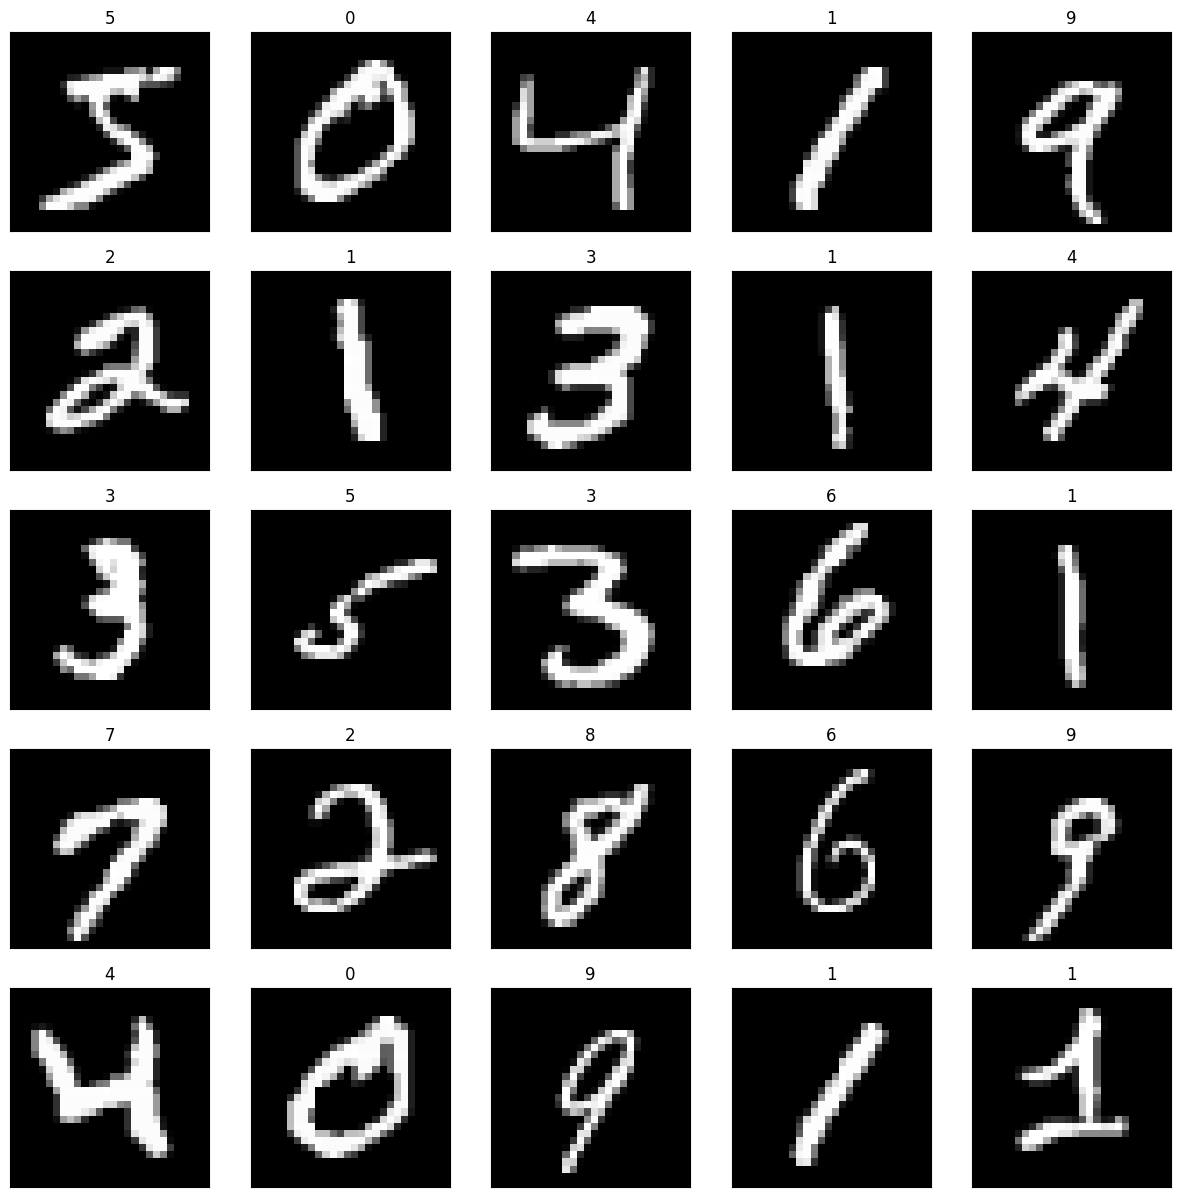

In [5]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])

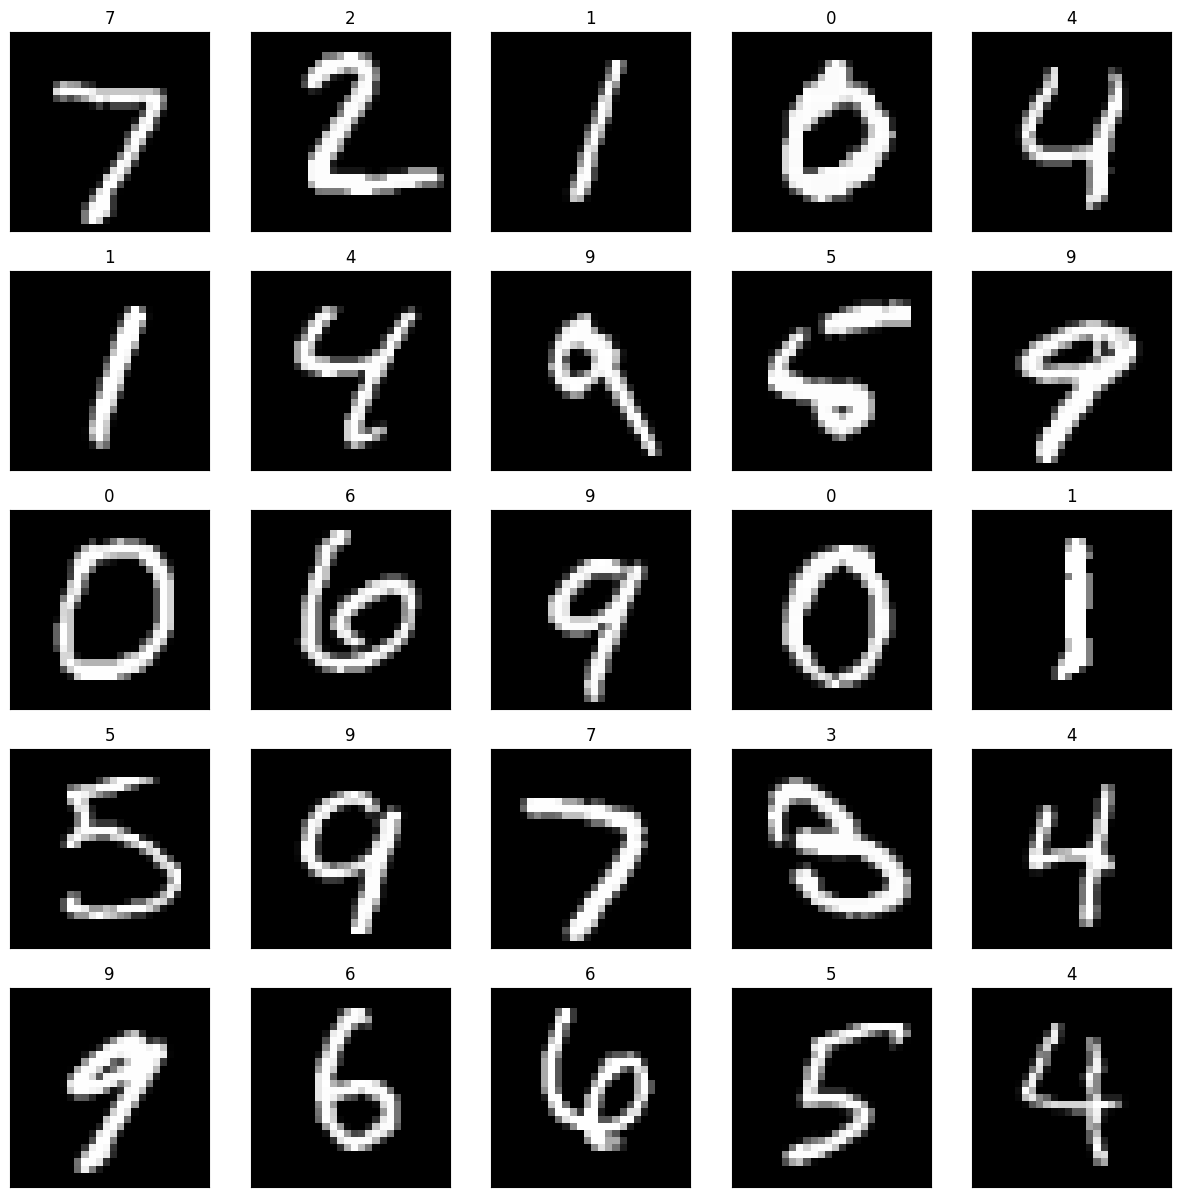

In [6]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(y_test[i])
    plt.xticks([])
    plt.yticks([])

##### Data Preparation

In [7]:
#Normalize data
x_train = x_train / 255
x_test = x_test / 255

In [8]:
#Conver 2D to 1D
x_train[0].shape

(28, 28)

In [9]:
num = np.array([[5,6,7],[1,9,3]])

In [10]:
num

array([[5, 6, 7],
       [1, 9, 3]])

In [11]:
np.reshape(num, num.size)

array([5, 6, 7, 1, 9, 3])

In [12]:
num.reshape(-1)

array([5, 6, 7, 1, 9, 3])

In [13]:
num.flatten()

array([5, 6, 7, 1, 9, 3])

In [14]:
np.size(num)

6

In [15]:
temp = x_train.flatten()
temp

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
temp.shape

(47040000,)

In [17]:
temp = x_train.reshape(-1, x_train[0].size)

In [18]:
temp.shape

(60000, 784)

In [19]:
x_train = x_train.reshape(-1, x_train[0].size)
x_test = x_test.reshape(-1, x_test[0].size)

In [20]:
x_train.shape

(60000, 784)

In [21]:
x_test.shape

(10000, 784)

##### prepare the output variable

In [22]:
import seaborn as sns

<Axes: xlabel='count'>

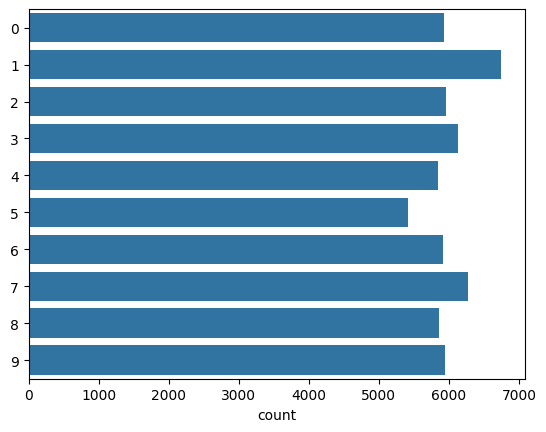

In [23]:
sns.countplot(y = y_train)

In [24]:
y_train.shape

(60000,)

In [25]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [26]:
y_train_new.shape

(60000, 10)

In [27]:
y_test_new.shape

(10000, 10)

In [28]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

##### Build the model

In [29]:
model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu'))

#Hidden Layers
model.add(Dense(256, activation= 'relu'))

#Output Layer
model.add(Dense(10, activation='softmax'))

In [30]:
from tensorflow.keras.utils import plot_model

In [31]:
pip install pydot

In [32]:
! sudo apt install graphviz

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
plot_model(model, show_layer_activations=True, show_shapes=True,
           show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


#### Compile the model

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

### Train the Model

In [35]:
history = model.fit(x_train, y_train_new, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9098 - loss: 0.2939
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9721 - loss: 0.0947
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9800 - loss: 0.0651
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9851 - loss: 0.0480
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9871 - loss: 0.0423
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9899 - loss: 0.0343
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9904 - loss: 0.0339
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9926 - loss: 0.0244
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9919 - loss: 0.0310
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9923 - loss: 0.0285


In [36]:
#### Evaluate the model

In [37]:
model.evaluate(x_test, y_test_new, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9740 - loss: 0.1783


[0.14176957309246063, 0.9787999987602234]

In [38]:
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()

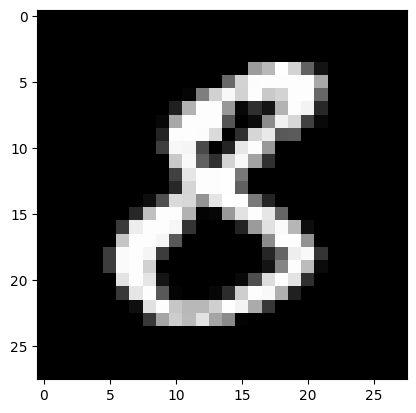

In [39]:
new = x_te[1234]
plt.imshow(new, cmap='gray')

In [40]:
new= new.reshape(1,784)
new= new/255
probs = model.predict(new, verbose=False)
print(probs.argmax())

8


In [41]:
### New-Char.png - predicting on unknown data

In [42]:
import cv2

In [43]:
img = cv2.imread('new-char.png', 0)

In [44]:
img_new = cv2.resize(img, (28,28))

In [45]:
new= img_new.reshape(1,784)
new= new/255
probs = model.predict(new, verbose=False)
print(probs.argmax())

2


In [46]:
## new-char.jpg

In [47]:
img = cv2.imread('new-char1.jpg', 0)
img

array([[191, 191, 191, ..., 187, 186, 183],
       [191, 191, 191, ..., 185, 183, 183],
       [191, 191, 191, ..., 183, 181, 183],
       ...,
       [191, 191, 191, ..., 182, 182, 183],
       [191, 191, 191, ..., 182, 182, 183],
       [191, 191, 191, ..., 182, 182, 182]], dtype=uint8)

In [48]:
img_new = cv2.resize(img, (28,28))

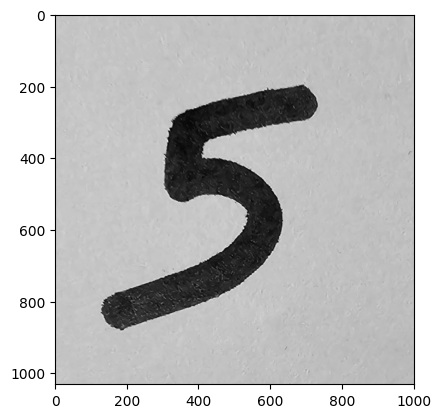

In [49]:
plt.imshow(img, cmap='gray')

In [50]:
thresh, img_thresh = cv2.threshold(img,127, 255, cv2.THRESH_BINARY_INV)